<a href="https://colab.research.google.com/github/lln-cid20/prog-ciencia-dados/blob/master/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APRESENTAÇÃO**

**Resumo**

Este trabalho, realizado como atividade final da disciplina de Programação para Ciência de Dados, do curso de Pós-graduação em Ciência de Dados 2020/2021, apresenta os resultados da análise sobre uma base de dados de tweets, procurando identificar as diversas perguntas feitas em relação à COVID-19, bem como classificar as perguntas conforme os tipos a seguir: sintomas, tratamento, entidades e pessoas.


**Autores**



*   Levi Delmiro De Souza Bessa
*   Lelson Lopes Nascimento




# **TRABALHO**

# 1 - Analise Inicial

Aqui são carregadas as bibliotecas básicas usadas no projeto



In [ ]:
import numpy as np
import pandas as pd

# 2 - Carga do arquivo com os tweetes

Ler o arquivo usando o dataframe panda 

In [ ]:
# Importa bibliotecas que permitem ler o CSV para o Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({"id":"19XzSWYcWbew7PHTCCb6QZXLKX0GSp7HC"})
downloaded.GetContentFile("dados-curso-completo.csv")

# https://drive.google.com/file/d/19XzSWYcWbew7PHTCCb6QZXLKX0GSp7HC/view?usp=sharing

dados = pd.read_csv("dados-curso-completo.csv")

# 3 - Verificação inicial dos dados e Gráficos da base de dados bruta

Apresentar o tipo de dados

In [ ]:
type(dados)


pandas.core.frame.DataFrame

Mostrar os primeiros registros do banco de dados importado

In [ ]:
dados.head(5)


,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,data_inversa
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],2020-03-23 18:51:14
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[],2020-03-18 03:18:14
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[],2020-03-29 12:09:27
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],2020-04-01 21:11:07
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[],2020-03-19 17:49:40


Criação de uma coluna para agrupar tweets de forma diária

In [ ]:
dados['data_inversa'] = pd.to_datetime(dados['data'],yearfirst=True, format='%Y-%m-%d')

Agrupar os dados com base na nova coluna, criando um dataframe com os dados agrupados

In [ ]:
dados_sumario = dados['data_inversa'].groupby(dados['data_inversa'].dt.to_period('D')).agg('count').to_frame()


Criar coluna para contagem de tweets

In [ ]:
dados_sumario.columns = ['cont_tweets']


Mostrar os primeiros registros do dataframe de valores agregados por dia

In [ ]:
dados_sumario.head(5)

,cont_tweets
data_inversa,
2020-01-01,28
2020-01-02,70
2020-01-03,71
2020-01-04,79
2020-01-05,69


Apresentar um gráfico de linhas visando mostrar a evolução do número de tweets ao longo do tempo

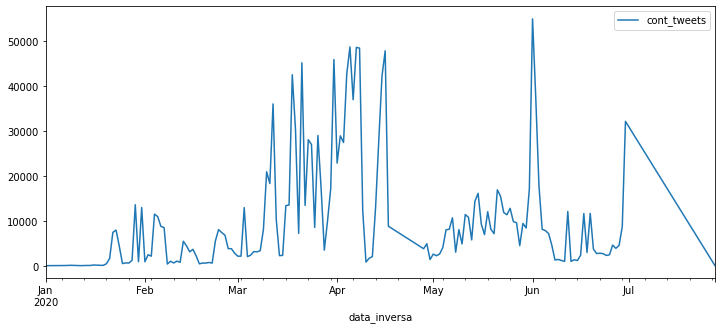

In [ ]:
dados_sumario.plot(figsize=(12,5))

Criando um dataframe com base no total de tweets por lugar e Ordenando as cidades em ordem decrescente de número de tweets

In [ ]:
dados_cidades = dados['lugar'].groupby(dados['lugar']).agg('count').to_frame()
dados_cidades.columns = ['cont_tweets']

dados_cidades = dados_cidades.sort_values(['cont_tweets','lugar'], ascending=False)

Exibindo as cidades com maiores números de tweets

In [ ]:
dados_cidades.head(10)

,cont_tweets
lugar,
Rio de Janeiro,8443
Sao Paulo,7469
Brasília,2822
Porto Alegre,1866
Belo Horizonte,1764
Curitiba,1418
Recife,1361
Fortaleza,1282
Belém,1246


Selecionar as 10 primeiras cidades para exibição em um gráfico

In [ ]:
dados_cidades = dados_cidades[0:9]

print(dados_cidades.count)

<bound method DataFrame.count of                 cont_tweets
lugar                      
Rio de Janeiro         8443
Sao Paulo              7469
Brasília               2822
Porto Alegre           1866
Belo Horizonte         1764
Curitiba               1418
Recife                 1361
Fortaleza              1282
Belém                  1246>


Apresentação do gráfico

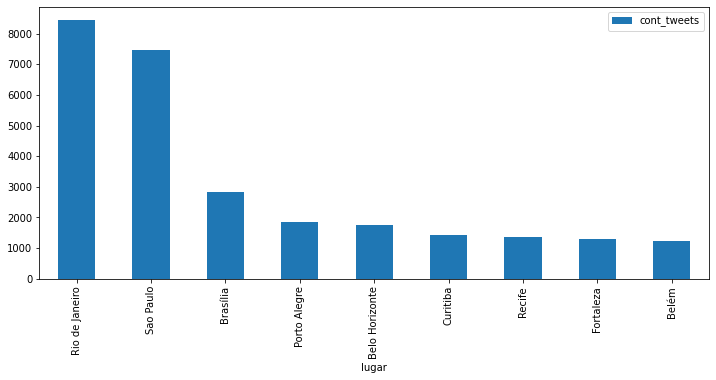

In [ ]:
dados_cidades.plot(kind= 'bar',figsize=(12,5))

In [ ]:
!pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp36-none-any.whl size=28555 sha256=8365c452d9d5f727b3c6864e832ef80a77c7c2b8140f832f585dc66d61d6ff27
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [ ]:
import mplleaflet as mll


# Importa bibliotecas que permitem ler o CSV para o Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({"id":"1lw4fMtQKWezaFlRNzzAU2HltdnFcE88g"})
downloaded.GetContentFile("cidades_brasil.csv")  
cidades = pd.read_csv('cidades_brasil.csv')
#cidades = pd.read_csv('https://drive.google.com/file/d/1lw4fMtQKWezaFlRNzzAU2HltdnFcE88g/view?usp=sharing') 

cidades['LATITUDE'] = cidades.LATITUDE.replace(".",",")
cidades['LONGITUDE'] = cidades.LONGITUDE.replace(".",",")

cidades['LATITUDE'] = cidades.LATITUDE.astype('float')
cidades['LONGITUDE'] = cidades.LONGITUDE.astype('float')


merged_df = pd.merge(left=dados_cidades, right=cidades, left_on='lugar', right_on='nome')

# dados_cidades = dados_cidades[dados_cidades['']]

merged_df.head(5)



,cont_tweets,nome,LATITUDE,LONGITUDE
0,8443,Rio de Janeiro,-22.913868,-43.201041
1,2822,Brasília,-15.780421,-47.930434
2,1866,Porto Alegre,-30.032732,-51.207441
3,1764,Belo Horizonte,-19.911129,-43.927314
4,1418,Curitiba,-25.420501,-49.265468


In [ ]:
print(merged_df.count)

<bound method DataFrame.count of     cont_tweets            nome   LATITUDE  LONGITUDE
0          8443  Rio de Janeiro -22.913868 -43.201041
1          2822        Brasília -15.780421 -47.930434
2          1866    Porto Alegre -30.032732 -51.207441
3          1764  Belo Horizonte -19.911129 -43.927314
4          1418        Curitiba -25.420501 -49.265468
5          1361          Recife  -8.047509 -34.877641
6          1282       Fortaleza  -9.805604 -65.526657
7          1282       Fortaleza  -3.717430 -38.542923
8          1246           Belém  -6.743460 -35.517221
9          1246           Belém  -9.570906 -36.490700
10         1246           Belém  -1.456154 -48.490511>


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(merged_df['LONGITUDE'], merged_df['LATITUDE'], marker='.',)
mll.show()

# 4 - Extração da Base de dados de perguntas dentre os tweets

In [ ]:
print(type(dados['texto']))

<class 'pandas.core.series.Series'>


In [ ]:
print(dados.count)

<bound method DataFrame.count of                         data  ...        data_inversa
0        2020-03-23 18:51:14  ... 2020-03-23 18:51:14
1        2020-03-18 03:18:14  ... 2020-03-18 03:18:14
2        2020-03-29 12:09:27  ... 2020-03-29 12:09:27
3        2020-04-01 21:11:07  ... 2020-04-01 21:11:07
4        2020-03-19 17:49:40  ... 2020-03-19 17:49:40
...                      ...  ...                 ...
1658820  2020-03-13 17:26:18  ... 2020-03-13 17:26:18
1658821  2020-05-12 13:02:34  ... 2020-05-12 13:02:34
1658822  2020-03-19 18:16:30  ... 2020-03-19 18:16:30
1658823  2020-04-07 18:14:45  ... 2020-04-07 18:14:45
1658824  2020-06-02 16:04:51  ... 2020-06-02 16:04:51

[1658825 rows x 14 columns]>


In [ ]:
dados2 = dados.loc[dados.texto.str.find('?') >= 0 ]

In [ ]:
print(dados2.count)

<bound method DataFrame.count of                         data  ...        data_inversa
0        2020-03-23 18:51:14  ... 2020-03-23 18:51:14
3        2020-04-01 21:11:07  ... 2020-04-01 21:11:07
38       2020-06-25 11:09:19  ... 2020-06-25 11:09:19
45       2020-04-06 15:44:36  ... 2020-04-06 15:44:36
57       2020-03-30 00:43:36  ... 2020-03-30 00:43:36
...                      ...  ...                 ...
1658795  2020-03-24 23:50:14  ... 2020-03-24 23:50:14
1658810  2020-03-26 21:43:24  ... 2020-03-26 21:43:24
1658818  2020-05-25 22:53:13  ... 2020-05-25 22:53:13
1658820  2020-03-13 17:26:18  ... 2020-03-13 17:26:18
1658821  2020-05-12 13:02:34  ... 2020-05-12 13:02:34

[172501 rows x 14 columns]>


In [ ]:
dados2.head(10)

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags,data_inversa
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[],2020-03-23 18:51:14
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[],2020-04-01 21:11:07
38,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@ipratesMD @dr_pampers Será que corremos o ris...,0,86,pt,NaN,NaN,NaN,NaN,NaN,[],2020-06-25 11:09:19
45,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,Prioridade ?!\n\n #COVID19 #floripa #isolament...,0,219,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']",2020-04-06 15:44:36
57,2020-03-30 00:43:36,Valnei do Val,vdoval,"Que tal uma notícia boa, indo na contramão do ...",0,201,pt,NaN,NaN,NaN,NaN,NaN,[],2020-03-30 00:43:36
73,2020-04-07 23:19:44,Mauricio Ligabo,LigaboMauricio,@JoseMedeirosMT Seria isso algum tipo aleatóri...,0,23,pt,NaN,NaN,NaN,NaN,NaN,[],2020-04-07 23:19:44
77,2020-04-13 19:16:51,Gus,arrombagus,"""Nova York é o novo epicentro da pandemia de c...",3,253,pt,Santos,Brazil,BR,NaN,NaN,[],2020-04-13 19:16:51
116,2020-05-15 18:15:33,Silveacyr Maria Coelho Santos,silveacyr,@mitags Será por que o Bolsonaro não fez propa...,0,67,pt,NaN,NaN,NaN,NaN,NaN,[],2020-05-15 18:15:33
118,2020-04-08 22:04:51,lulleitao,lulleitao,@JeanSCorrea7 Mas ele não deu a entender que o...,0,2315,pt,NaN,NaN,NaN,NaN,NaN,[],2020-04-08 22:04:51
119,2020-04-02 13:04:55,Luizcarlosdospatetas@hotmail.com,Luizcarlosdosp5,#perguntacorona \nQuero saber se a covid tem c...,0,0,pt,NaN,NaN,NaN,NaN,NaN,['perguntacorona'],2020-04-02 13:04:55


Extrair as perguntas dos tweets que apresentam perguntas


In [ ]:
print(dados2.dtypes)

data                    object
usuario                 object
apelido                 object
texto                   object
retweet                  int64
seguidores               int64
idioma                  object
lugar                   object
pais                    object
sigla                   object
latitude               float64
longitude              float64
hashtags                object
data_inversa    datetime64[ns]
dtype: object


In [ ]:
import nltk

from nltk import sent_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

#dados2['pergunta_extraida'] = sent_tokenize(dados2.texto.str)

#print(dados2.dtypes)

print(type(dados2.texto.str.))

<class 'pandas.core.strings.StringMethods'>


# 5 - Classificação das perguntas conforme o foco


# 6 - Gráficos da Base Classificada

# 7 - Conclusões